# Hubungan Durasi Musik dan Kepopuleran dalam Playlist: Analisis Klaster dengan Metode K-Means pada Dataset Spotify

# Flowchart dan Pseudocode

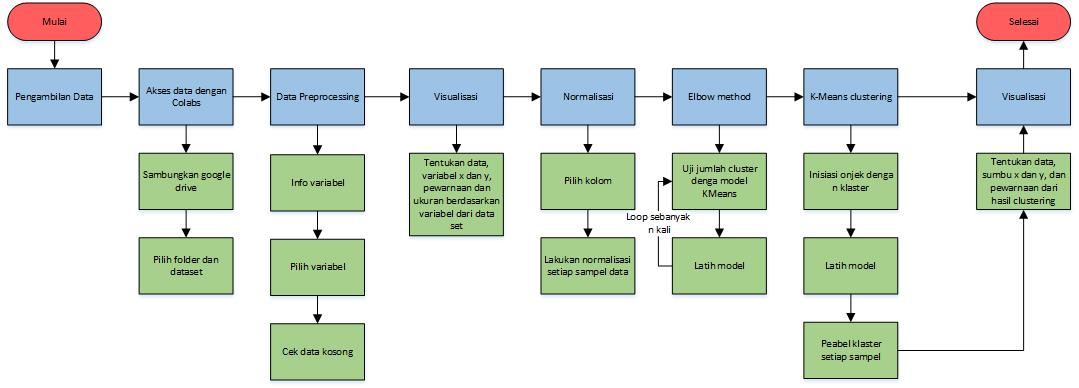



```
# Data
sambungkan google drive
pilih folder dan data set yagn akan di gunakan

# Visualiasi Data
tentukan ukuran plot
tentukan sumbu x dan y berdasarkan variabel dalam data set
tentukan warna dan ukuran titik data berdasarkan variabel
set warna dengan menggunakan palet bawaan 'Set2'
tampilkan plot

# Normalisasi Data
pilih kolom yang di butuhkan
simpak kolom pada variabel x
lakukan normalisasi dengan fungsi normalize pada preprocessing

# Elbow Method
inisisasi list kosong untuk menyimpan inertia (jarak data dalam clustering)
lakukan KMeans dengan n cluster
latih model
seimpan setiap hasil/nilai inertia ke dalam list
lakukan iterasi untuk mencoba cluster sebanyak n kali
tampilkan plot elbow dengan titik yang disambukan garis

# K-Means Clustering
inisiasi objek KMeans denga cluster n(sesuai elbow method)
berikan label pada setiap cluster data
tampilkan plot dengan sumbu x dan y sesuai variabel dan warna titik sesuai label cluster data
```



# dataset  Spotify

### **Deskripsi Data**



1. **track_id:** karakter - ID unik lagu
2. **track_name:** karakter - Nama lagu
3. **track_artist:** karakter - Artis lagu
4. **track_popularity:** bilangan riil - Popularitas lagu (0-100) di mana nilai yang lebih tinggi lebih baik
5. **track_album_id:** karakter - ID unik album
6. **track_album_name:** karakter - Nama album lagu
7. **track_album_release_date:** karakter - Tanggal rilis album
8. **playlist_name:** karakter - Nama playlist
9. **playlist_id:** karakter - ID playlist
10. **playlist_genre:** karakter - Genre playlist
11. **playlist_subgenre:** karakter - Subgenre playlist
12. **danceability:** bilangan riil - Danceability menggambarkan seberapa cocok lagu untuk menari berdasarkan kombinasi elemen musik termasuk tempo, stabilitas ritme, kekuatan beat, dan keteraturan keseluruhan. Nilai 0.0 adalah yang paling tidak cocok untuk menari dan 1.0 adalah yang paling cocok untuk menari.
13. **energy:** bilangan riil - Energi adalah ukuran dari 0.0 hingga 1.0 dan mewakili ukuran persepsi intensitas dan aktivitas. Biasanya, lagu yang energik terasa cepat, keras, dan berisik. Misalnya, death metal memiliki energi tinggi, sementara prelude Bach mendapat nilai rendah pada skala ini.
14. **key:** bilangan riil - Kunci keseluruhan yang diestimasi dari lagu. Bilangan bulat memetakan ke nada menggunakan notasi Pitch Class standar. Misalnya, 0 = C, 1 = C♯/D♭, 2 = D, dan seterusnya. Jika tidak ada kunci yang terdeteksi, nilai adalah -1.
15. **loudness:** bilangan riil - Kekuatan suara keseluruhan dari lagu dalam desibel (dB). Nilai loudness diukur rata-rata di seluruh lagu dan berguna untuk membandingkan kekuatan relatif lagu-lagu. Nilai umumnya berkisar antara -60 dan 0 dB.
16. **mode:** bilangan riil - Mode menunjukkan modalitas (mayor atau minor) dari lagu, jenis skala dari kontennya. Mayor direpresentasikan oleh 1 dan minor adalah 0.
17. **speechiness:** bilangan riil - Speechiness mendeteksi kehadiran kata-kata yang diucapkan dalam lagu. Nilai mendekati 1.0 menggambarkan rekaman yang mirip pidato, sementara nilai di atas 0.66 menggambarkan lagu-lagu yang mungkin terbuat sepenuhnya dari kata-kata yang diucapkan.
18. **acousticness:** bilangan riil - Ukuran kepercayaan dari 0.0 hingga 1.0 apakah lagu akustik. Nilai 1.0 mewakili keyakinan tinggi bahwa lagu tersebut akustik.
19. **instrumentalness:** bilangan riil - Memprediksi apakah lagu tidak mengandung vokal. Nilai mendekati 1.0 menunjukkan kemungkinan besar lagu tersebut tidak mengandung konten vokal.
20. **liveness:** bilangan riil - Mendeteksi kehadiran audien dalam rekaman. Nilai liveness yang lebih tinggi mewakili probabilitas yang meningkat bahwa lagu itu dilakukan secara langsung.
21. **valence:** bilangan riil - Ukuran dari 0.0 hingga 1.0 yang menggambarkan kepositifan musik yang disampaikan oleh lagu.
22. **tempo:** bilangan riil - Tempo keseluruhan yang diestimasi dari lagu dalam ketukan per menit (BPM).
23. **duration_ms:** bilangan riil - Durasi lagu dalam milidetik.

Data ini adalah data yang menunjukkan musik yang populer di aplikasi Spotify. Data ini meninjau banyak hal seperti notasi pitch, intrumen sampai durasi yang mugnkin mempengaruhi kepopuleran sebuha lagu

### 1. Data Loading



In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
import pandas as pd

df3 = pd.read_csv(("/content/spotify.csv"), index_col = "track_id")
df3.head(3)

,track_name,track_artist,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
track_id,,,,,,,,,,,,,,,,,,,,,
6f807x0ima9a1j3VPbc7VN,I Don't Care (with Justin Bieber) - Loud Luxur...,Ed Sheeran,66,2oCs0DGTsRO98Gh5ZSl2Cx,I Don't Care (with Justin Bieber) [Loud Luxury...,2019-06-14,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,6,-2.634,1,0.0583,0.1020,0.000000,0.0653,0.518,122.036,194754
0r7CVbZTWZgbTCYdfa2P31,Memories - Dillon Francis Remix,Maroon 5,67,63rPSO264uRjW1X5E6cWv6,Memories (Dillon Francis Remix),2019-12-13,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,11,-4.969,1,0.0373,0.0724,0.004210,0.3570,0.693,99.972,162600
1z1Hg7Vb0AhHDiEmnDE79l,All the Time - Don Diablo Remix,Zara Larsson,70,1HoSmj2eLcsrR0vE9gThr4,All the Time (Don Diablo Remix),2019-07-05,Pop Remix,37i9dQZF1DXcZDD7cfEKhW,pop,dance pop,...,1,-3.432,0,0.0742,0.0794,0.000023,0.1100,0.613,124.008,176616


In [ ]:
df3.describe()

,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000,32833.000000
mean,42.477081,0.654850,0.698619,5.374471,-6.719499,0.565711,0.107068,0.175334,0.084747,0.190176,0.510561,120.881132,225799.811622
std,24.984074,0.145085,0.180910,3.611657,2.988436,0.495671,0.101314,0.219633,0.224230,0.154317,0.233146,26.903624,59834.006182
min,0.000000,0.000000,0.000175,0.000000,-46.448000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4000.000000
25%,24.000000,0.563000,0.581000,2.000000,-8.171000,0.000000,0.041000,0.015100,0.000000,0.092700,0.331000,99.960000,187819.000000
50%,45.000000,0.672000,0.721000,6.000000,-6.166000,1.000000,0.062500,0.080400,0.000016,0.127000,0.512000,121.984000,216000.000000
75%,62.000000,0.761000,0.840000,9.000000,-4.645000,1.000000,0.132000,0.255000,0.004830,0.248000,0.693000,133.918000,253585.000000
max,100.000000,0.983000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.996000,0.991000,239.440000,517810.000000


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32833 entries, 6f807x0ima9a1j3VPbc7VN to 29zWqhca3zt5NsckZqDf6c
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_name                32828 non-null  object 
 1   track_artist              32828 non-null  object 
 2   track_popularity          32833 non-null  int64  
 3   track_album_id            32833 non-null  object 
 4   track_album_name          32828 non-null  object 
 5   track_album_release_date  32833 non-null  object 
 6   playlist_name             32833 non-null  object 
 7   playlist_id               32833 non-null  object 
 8   playlist_genre            32833 non-null  object 
 9   playlist_subgenre         32833 non-null  object 
 10  danceability              32833 non-null  float64
 11  energy                    32833 non-null  float64
 12  key                       32833 non-null  int64  
 13  loudness                  32

In [ ]:
# membuang kolom selain integer dan float
df3 = df3.drop(['track_name','track_artist','track_album_id',
                'track_album_name','track_album_release_date','playlist_name',
                'playlist_id','playlist_genre','playlist_subgenre'],axis = 1)


In [ ]:
print(df3.columns)

Index(['track_popularity', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms'],
      dtype='object')


In [ ]:
# melihat data kosong
df3.isnull().sum()

track_popularity    0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
duration_ms         0
dtype: int64

### 2. Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='duration_ms', ylabel='track_popularity'>

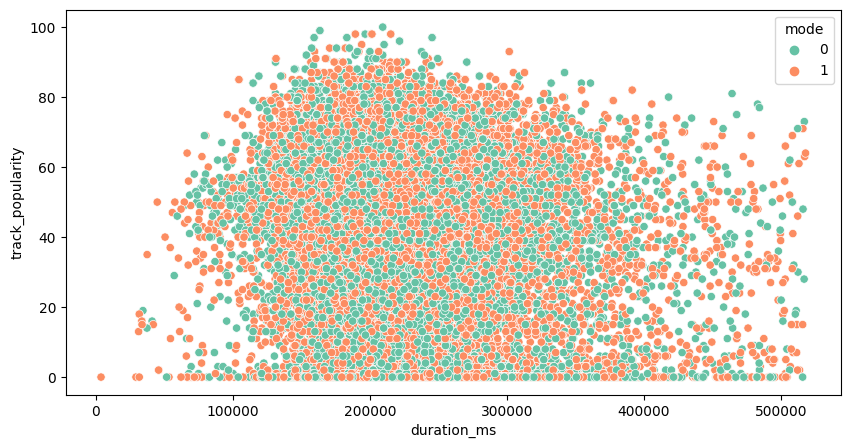

In [ ]:
plt.figure(1 , figsize = (10, 5))
sns.scatterplot(
    data=df3,
    x="duration_ms",
    y = "track_popularity",
    hue = "mode",
    palette = "Set2"
)

### 3. Normalizing



In [ ]:
from sklearn import preprocessing

X = df3
X_norm = preprocessing.normalize(X)

### 4. Elbow Method

In [ ]:
import numpy as np
from sklearn.cluster import KMeans

def elbow_plot(data,clusters):
  inertia = []
  for n in range(1, clusters):
    algorithm  = KMeans (
        n_clusters=n,
        init="k-means++",
        random_state=125,
    )
    algorithm.fit(data)
    inertia.append(algorithm.inertia_)

  # Plot
  plt.plot(np.arange(1, clusters), inertia , 'o')
  plt.plot(np.arange(1, clusters), inertia , '-', alpha = 0.5)
  plt.xlabel('Number of Clusters'), plt.ylabel('Inertia')
  plt.show();

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

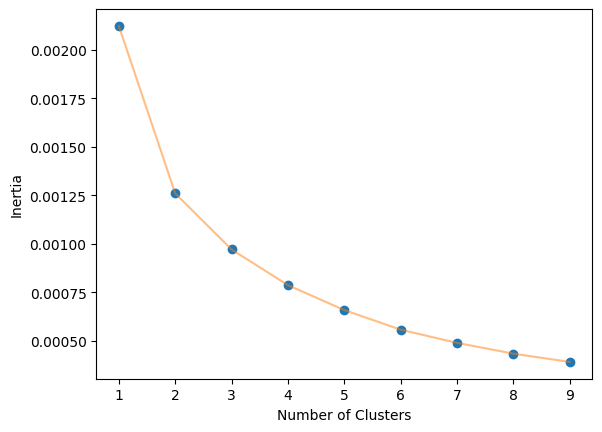

In [ ]:
elbow_plot(X_norm, 10)

Pada plot tersebut dapat dilihat terjadi penurunan yang cukup drastis pada titik 1 sampai 3. Maka klaster yang mungkin optimal adalah 2 atau 3.

### 5. K-Means Clustering


In [ ]:
algorithm = KMeans(n_clusters=3, init="k-means++", random_state=125)
algorithm.fit(X_norm)
labels = algorithm.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


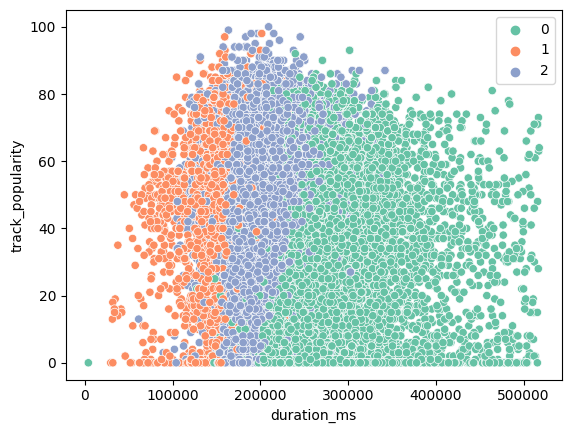

In [ ]:
sns.scatterplot(data = X,
                x = "duration_ms",
                y ="track_popularity",
                hue = labels,
                palette="Set2");

**Analisis**<br>
Dari plot K-Means tersebut dapat dilihat terdapat 3 pembagian cluster data, yang meliputi
- 0 => musik yang memiliki durasi paling lama (2-5 menit) serta menjadi data yang paling dominan. dari kepopuleran cluster ini cukup rata dari terpopuler sampai tidak, hal ini mengindikasikan bahwa rata-rata musik ada di rentang durasi 2-5 menit sehingga tingkat kepopulerannya juga tidak dominan pada rentang populer atau tidak
- 1 => musik yang memiliki durasi yang paling singkat (<=1.5 menit) serta menjadi data yang paling sedikit, dapat dilihat juga kepopuleran dari cluster ini mendominasi di tengah, hal ini mengindikasikan bahwa musik dengan durasi singkat masih cukup populer namun cukup sedikit musik ynag memiliki durasi singkat
- 2 => musik yang memiliki durasi sekitar 1.5 -2.5 menit, dapat dilihat kluster ini cenderung berada di tingkat kepopuleran menengah ke atas (40-100), hal ini mengindikasikan bahwa musik pada cluster ini cenderung lebih populer dari cluster lain

## Kesimpulan

Dari ke-percobaan data set, terdapat kesulitan dalam penentuan variabel clustering yang dapat dilihat dari plot yang dihasilkan. Pada beberapa variabel(kolom) tidak dapat dilakukan clustering dengan baik, terlihat pada titik di dalam plot yang saling bertumpukan dan tidak linear. Hal ini terjadi dengan asumsi data dalam variabel yang terlalu beragam, sehingga proses clustering tidak berjalan optimal, bahkan beberapa gagal karena plot tidak dapat menampung data, selain itu variabel yang hanya memiliki berapa nilai yang bersifat unik, juga tidak "terlihat" optimal dimana titik saling bertumpu pada plot yang dihasilkan, dengan catatan tidak terlihat optimal karena kerapatan sumbu x yang terlalu luas sehingga data tidak terlihat dengan baik. Asumsi lainnya adalah model yang kurang optimal sehingga tidak dapat melakukan clustering pada data yang kompleks.